In [1]:
# Import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data set
data=pd.read_csv('auto_insurance_payment.csv')
data

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194
...,...,...
58,9,874
59,31,2098
60,14,955
61,53,2446


In [4]:
data.shape

(63, 2)

In [5]:
data.describe()

,Number of claims,Total Payment
count,63.000000,63.000000
mean,22.904762,921.873016
std,23.351946,878.266281
min,0.000000,0.000000
25%,7.500000,299.000000
50%,14.000000,596.000000
75%,29.000000,1364.000000
max,124.000000,4222.000000


In [7]:
data.isnull().sum()

Number of claims    0
 Total Payment      0
dtype: int64

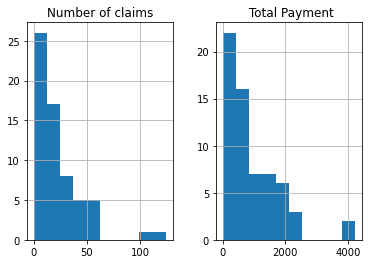

In [9]:
# Frequency Distribution
data.hist()
plt.show()

C:\Users\91956\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


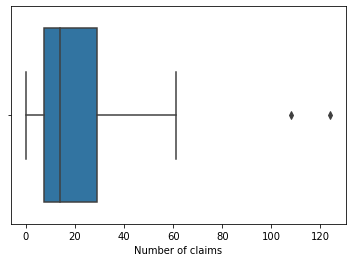

In [11]:
# Boxplot to check outlier in data
sns.boxplot(data['Number of claims'],data=data)
plt.show()

C:\Users\91956\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


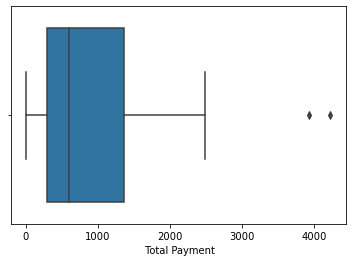

In [12]:
# Boxplot to check outlier in data
sns.boxplot(data[' Total Payment'],data=data)
plt.show()

In [13]:
# Extract the independent variable and dependent var
X=data.iloc[:,:1].values
y=data.iloc[:,1].values

In [14]:
X

array([[108],
       [ 19],
       [ 13],
       [124],
       [ 40],
       [ 57],
       [ 23],
       [ 14],
       [ 45],
       [ 10],
       [  5],
       [ 48],
       [ 11],
       [ 23],
       [  7],
       [  2],
       [ 24],
       [  6],
       [  3],
       [ 23],
       [  6],
       [  9],
       [  9],
       [  3],
       [ 29],
       [  7],
       [  4],
       [ 20],
       [  7],
       [  4],
       [  0],
       [ 25],
       [  6],
       [  5],
       [ 22],
       [ 11],
       [ 61],
       [ 12],
       [  4],
       [ 16],
       [ 13],
       [ 60],
       [ 41],
       [ 37],
       [ 55],
       [ 41],
       [ 11],
       [ 27],
       [  8],
       [  3],
       [ 17],
       [ 13],
       [ 13],
       [ 15],
       [  8],
       [ 29],
       [ 30],
       [ 24],
       [  9],
       [ 31],
       [ 14],
       [ 53],
       [ 26]], dtype=int64)

In [15]:
y

array([3925,  462,  157, 4222, 1194, 1709,  569,  775,  214,  653,  209,
       2481,  235,  396,  488,   66, 1349,  509,   44,  113,  148,  487,
        521,  132, 1039,  775,  118,  981,  279,  381,    0,  692,  146,
        403, 1615,  572, 2176,  581,  126,  596,  899, 2024, 1813, 1528,
       1628,  734,  213,  926,  761,  399, 1421,   93,  319,  321,  556,
       1333, 1945, 1379,  874, 2098,  955, 2446, 1875], dtype=int64)

In [16]:
# Split the data into train set & test set X & Y -4 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50, 1)
(13, 1)
(50,)
(13,)


In [23]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [25]:
# Training
linear_reg.fit(X_train,y_train)

LinearRegression()

In [26]:
# testing / predict
y_pred=linear_reg.predict(X_test)

In [27]:
y_pred

array([ 378.38172349,  446.76822577, 1540.95226225,  515.15472805,
        309.99522121,  549.34797919, 1130.63324857,  309.99522121,
       1404.17925769,  891.28049059, 4378.99210688,  378.38172349,
       2190.62403391])

In [28]:
y_test

array([ 279,  487,  734,  213,  403,  581, 1333,  209, 1528, 1615, 4222,
        775, 2024], dtype=int64)

In [30]:
# Calculation of Error
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared error is",mse)

Mean Squared error is 120275.88338722772


In [31]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared error is",rmse)

Root Mean Squared error is 346.808136275993


In [32]:
# Rsquare Value
r_score=r2_score(y_test,y_pred)
print(r_score)

0.8938340090168151


In [33]:
# y=mx+c
linear_reg.coef_

array([34.19325114])

In [34]:
linear_reg.intercept_


139.02896551170898

In [35]:
# y=mx+c  :   y=34.19x+139

In [36]:
# Visualization

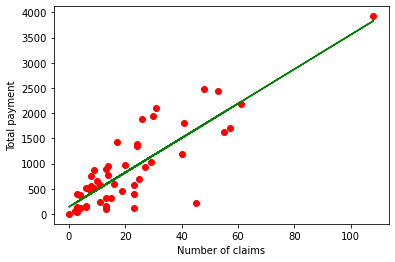

In [37]:
# Training data
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,linear_reg.predict(X_train),color='g')
plt.xlabel('Number of claims')
plt.ylabel('Total payment')
plt.show()

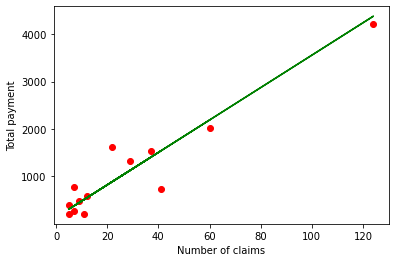

In [38]:
# Test data
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='g')
plt.xlabel('Number of claims')
plt.ylabel('Total payment')
plt.show()

In [39]:
# To Save the Model
# pickle 
# joblib

In [40]:
import joblib
filename='linear_regression.sav'
joblib.dump(linear_reg,filename)

['linear_regression.sav']

In [41]:
# for Use this model in future
# new notebook
import joblib
filename='linear_regression.sav'
model=joblib.load(filename)

In [43]:
# Prediction for new data
Claims=57
result=model.predict([[Claims]])
print("Payment to be done",result)

Payment to be done [2088.04428049]


In [45]:
data.head(5)

,Number of claims,Total Payment
0,108,3925
1,19,462
2,13,157
3,124,4222
4,40,1194


In [46]:
# Prediction for new data
Claims=124
result=model.predict([[Claims]])
print("Payment to be done",result)

Payment to be done [4378.99210688]


In [ ]:
# to share model with client


# Web page- flask, deploy ml model 
# mobile app
# Deploy ML model using streamlit
# github -cloud 